### ¿AFECTA EL CONSUMO DE BEBIDAS ALCOHOLICAS A LA FELICIDAD?

En primer lugar, importamos las librerias necesarias para realizar en analisis exploratorio del dataset escogido:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

A continuación importamos el archivo csv y lo almacenamos como 'data':

In [22]:
data = pd.read_csv('./dataset1_kaggle.csv', delimiter = ",")
data

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


Vemos cuántas filas y columnas tiene el DataFrame y de qué tipo son:

In [23]:
print(data.shape)
print(data.columns)

(122, 9)
Index(['Country', 'Region', 'Hemisphere', 'HappinessScore', 'HDI',
       'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita',
       'Wine_PerCapita'],
      dtype='object')


Eliminamos las columnas que no necesitamos en nuestro anañisis, creando un nuevo DataFrame llamado alcohol_felicidad:

In [30]:
alcohol_felicidad = data.drop(['Hemisphere', 'HDI', 'Spirit_PerCapita'], axis=1)
alcohol_felicidad

,Country,Region,HappinessScore,GDP_PerCapita,Beer_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,7.526,53.579,224,278
1,Switzerland,Western Europe,7.509,79.866,185,280
2,Iceland,Western Europe,7.501,60.530,233,78
3,Norway,Western Europe,7.498,70.890,169,129
4,Finland,Western Europe,7.413,43.433,263,97
...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,3.666,878.000,36,1
118,Liberia,Sub-Saharan Africa,3.622,455.000,19,2
119,Benin,Sub-Saharan Africa,3.484,789.000,34,13
120,Togo,Sub-Saharan Africa,3.303,577.000,36,19


Realizamos un analisis estadistico de las variables:

In [26]:
alcohol_felicidad['Beer_PerCapita'].describe()

count    122.000000
mean     137.565574
std      104.817353
min        1.000000
25%       38.250000
50%      125.500000
75%      224.750000
max      376.000000
Name: Beer_PerCapita, dtype: float64

In [27]:
alcohol_felicidad['Wine_PerCapita'].describe()

count    122.000000
mean      66.598361
std       88.121503
min        1.000000
25%        5.000000
50%       16.000000
75%      112.750000
max      370.000000
Name: Wine_PerCapita, dtype: float64

Comparando las variables estudidas, podemos observar que la media del consumo de cerveza es el doble que de vino pero que, tanto el consumo medio como el máximo de ambas bebidas es practicamente el mismo.

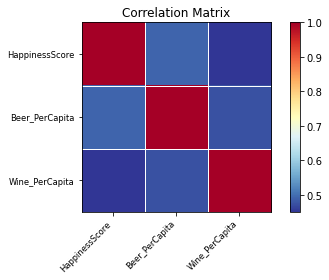

In [37]:
corr = alcohol_felicidad.set_index('GDP_PerCapita').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

En la matriz de correlación, observamos que el consumo de la cerveza está más correlacionado con la felicidad que el consumo del vino. Sin embargo, no podríamos decir que el consumo de estas bebidas está correlacionado con la felicidad.

Realizamos la misma matriz para ver la relación entre felicidad y renta per capita, y lo comparamos con el consumo de cerveza.

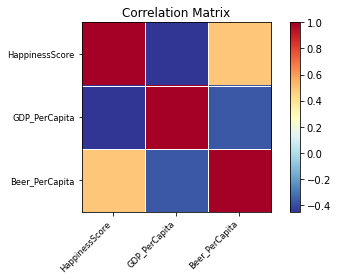

In [40]:
corr = alcohol_felicidad.set_index('Wine_PerCapita').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

Podemos observar que cuando metemos la variable de la renta per capita, la correlacion de la felicidad con el consumo de cerveza aumenta significativamente.

Por último, vamos a ver qué pais tiene mayor grado de felicidad, mayor renta por habitante, y dónde se consume más cerveza y vino.

In [41]:
felicidad = alcohol_felicidad.sort_values('HappinessScore',ascending=False)
felicidad.head()

,Country,Region,HappinessScore,GDP_PerCapita,Beer_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,7.526,53.579,224,278
1,Switzerland,Western Europe,7.509,79.866,185,280
2,Iceland,Western Europe,7.501,60.530,233,78
3,Norway,Western Europe,7.498,70.890,169,129
4,Finland,Western Europe,7.413,43.433,263,97


In [42]:
cerveza = alcohol_felicidad.sort_values('Beer_PerCapita',ascending=False)
cerveza.head()

,Country,Region,HappinessScore,GDP_PerCapita,Beer_PerCapita,Wine_PerCapita
90,Namibia,Sub-Saharan Africa,4.574,4.561,376,1
25,Czech Republic,Central and Eastern Europe,6.596,18.484,361,134
105,Gabon,Sub-Saharan Africa,4.121,7.079,347,59
14,Germany,Western Europe,6.994,42.233,346,175
50,Poland,Central and Eastern Europe,5.835,12.415,343,56


In [43]:
vino = alcohol_felicidad.sort_values('Wine_PerCapita',ascending=False)
vino.head()

,Country,Region,HappinessScore,GDP_PerCapita,Beer_PerCapita,Wine_PerCapita
30,France,Western Europe,6.478,36.870,127,370
79,Portugal,Western Europe,5.123,19.872,194,339
1,Switzerland,Western Europe,7.509,79.866,185,280
0,Denmark,Western Europe,7.526,53.579,224,278
55,Slovenia,Central and Eastern Europe,5.768,21.650,270,276


In [44]:
PIBpc = alcohol_felicidad.sort_values('GDP_PerCapita',ascending=False)
PIBpc.head()

,Country,Region,HappinessScore,GDP_PerCapita,Beer_PerCapita,Wine_PerCapita
101,Senegal,Sub-Saharan Africa,4.219,953.0,9,7
117,Tanzania,Sub-Saharan Africa,3.666,878.0,36,1
119,Benin,Sub-Saharan Africa,3.484,789.0,34,13
106,Mali,Sub-Saharan Africa,4.073,780.0,5,1
109,Comoros,Sub-Saharan Africa,3.956,775.0,1,1


Como conlusion se puede afirmar que el país con mayor rango de felicidad (Dinamarca), no coincide ni con el que mayor renta per capita tiene (Senegal), ni con el que consume más cerveza (Namibia) ni donde se consume más vino (Francia).

_Referencias:_
    
https://www.analyticslane.com

https://www.aprendemachinelearning.com/analisis-exploratorio-de-datos-pandas-python/

https://github.com/jupyter/nbconvert